<img src="https://github.com/Ushanshi-Sharma/Oyo-Cancellation-DA/raw/main/Screenshot%202024-05-05%20001257.png" width="900">


# Data Anlysis on OYO Hotels and Resorts

# Buisness Problem
##### Mock Problem
### In recent years, OYO hotels (City Hotel and Resort Hotel) have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.
### We will be analysing the problem by performing Data Analysis and will suggest possible solutions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df= pd.read_csv("hotel_booking.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2021,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2021,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2021,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2021,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03-07-2021,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2023,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2023,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2023,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2023,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2023,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2023,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2023,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2023,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2023,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,07-09-2023,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


## Exploratory Data Analysis and Data Cleaning

In [5]:
df.shape

(119390, 36)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card']
df = df.drop(columns=columns_to_drop)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], format='%d-%m-%Y', errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


#### Checking unique values in non-numerical columns

In [12]:
for col in df.describe(include = "object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

#### Handling for NULL values

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.drop(["company", "agent"], axis =1, inplace =True)  # Dropped columns with max null values

In [15]:
df.dropna(inplace=True)    # Removed Null values from other columns

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680.000000,118680
mean,0.371394,104.348778,2022.157946,27.191591,15.789206,0.928859,2.502899,1.858148,0.104171,0.007929,0.032027,0.087302,0.131850,0.221343,2.335035,102.050411,0.061855,0.571756,2022-07-30 21:10:29.726996992
min,0.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2020-10-17 00:00:00
25%,0.000000,18.000000,2022.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2022-02-01 00:00:00
50%,0.000000,70.000000,2022.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2022-08-08 00:00:00
75%,1.000000,161.000000,2023.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2023-02-09 00:00:00
max,1.000000,737.000000,2023.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2023-09-14 00:00:00
std,0.483179,106.885448,0.708076,13.585456,8.778422,0.996697,1.900603,0.578890,0.399077,0.097212,0.176073,0.846637,1.486018,0.653108,17.646354,50.495234,0.244125,0.792807,NaN


In [18]:
df = df[df["adr"]<5000]

## Data Analysis and Visualisation 

In [19]:
canceled_booking = df["is_canceled"].value_counts(normalize = True)
canceled_booking*100

is_canceled
0    62.861163
1    37.138837
Name: proportion, dtype: float64

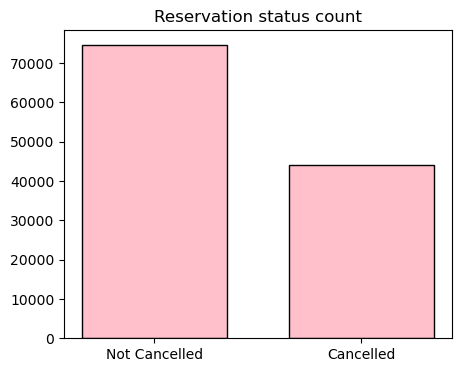

In [20]:
plt.figure(figsize =(5,4))
plt.title("Reservation status count")
plt.bar(["Not Cancelled","Cancelled"],df["is_canceled"].value_counts(), edgecolor= "k", width= 0.7, color = "pink")
plt.show()

### The accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant impact on the hotels' earnings.

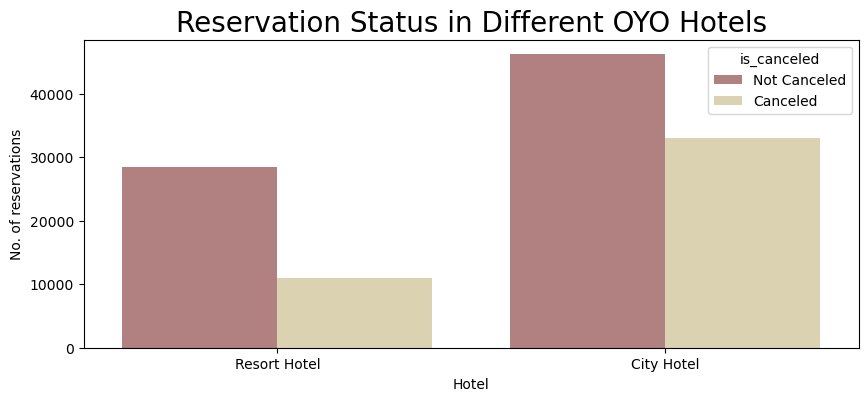

In [21]:
df['is_canceled'] = df['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

plt.figure(figsize=(10, 4))
ax1 = sns.countplot(x="hotel", hue="is_canceled", data=df, palette="pink")
plt.title("Reservation Status in Different OYO Hotels", size=20)
plt.xlabel("Hotel")
plt.ylabel("No. of reservations")

plt.show()


### In comparison to resort hotels, city hotels have more bookings. It is possible that Resort hotels are more expensive than that of City hotels.

In [22]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
Not Canceled    0.719994
Canceled        0.280006
Name: proportion, dtype: float64

In [23]:
city_hotel = df[df["hotel"] == "City Hotel"]
city_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
Not Canceled    0.583081
Canceled        0.416919
Name: proportion, dtype: float64

In [24]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

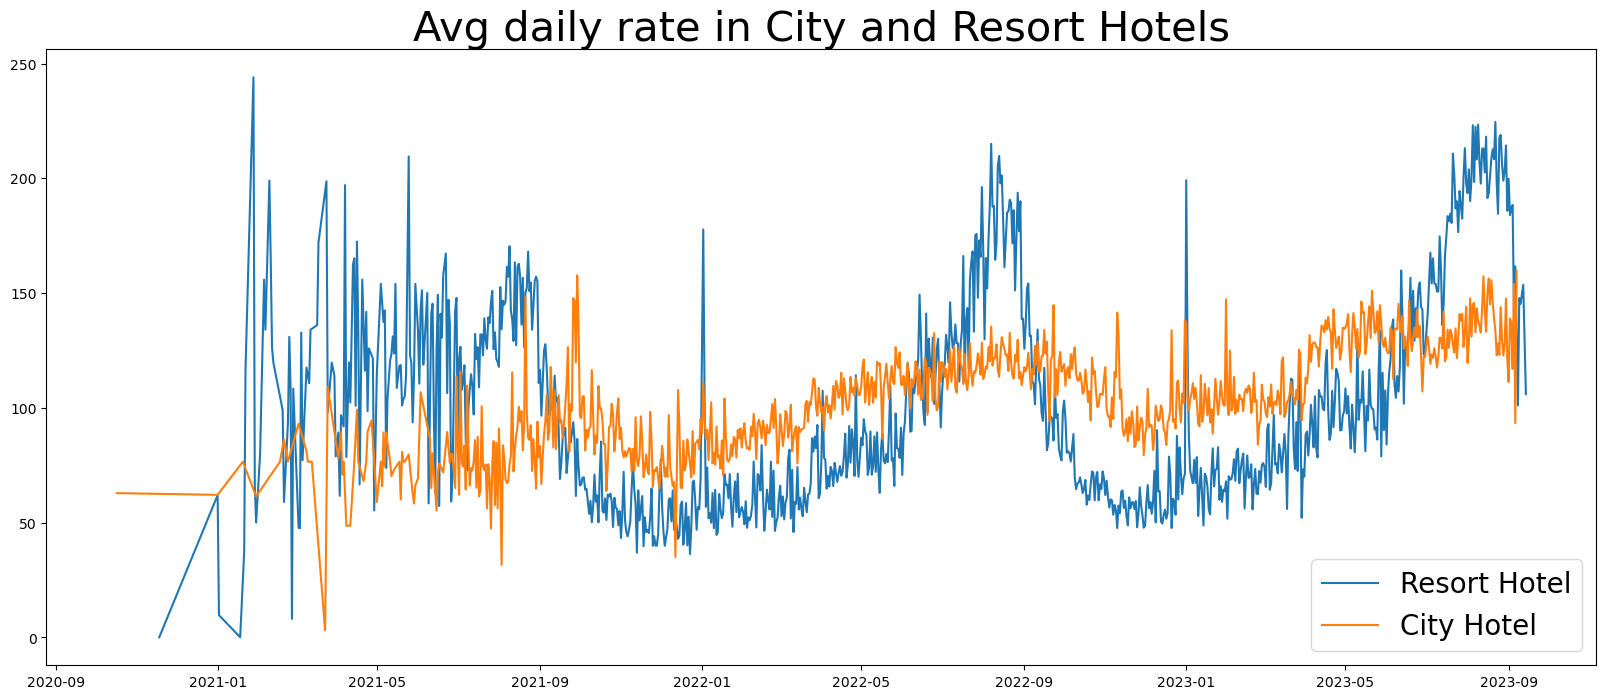

In [25]:
plt.figure(figsize = (20,8))
plt.title("Avg daily rate in City and Resort Hotels", fontsize =30)
plt.plot(resort_hotel.index, resort_hotel["adr"], label = "Resort Hotel")
plt.plot(city_hotel.index, city_hotel["adr"], label = "City Hotel")
plt.legend(fontsize = 20)
plt.show()

### The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is more. It goes without saying that weekends and holidays may see a rise in resort hotel rates.

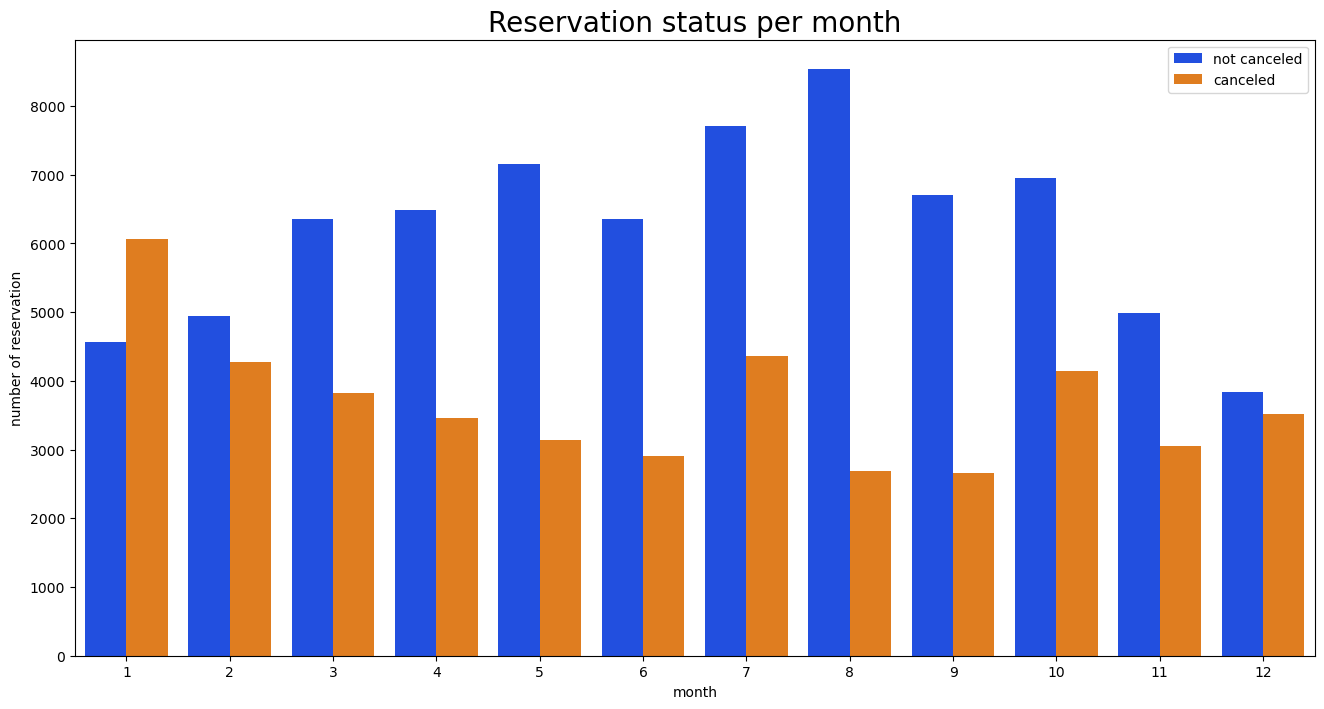

In [26]:
df["month"] = df["reservation_status_date"].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = "month", hue = "is_canceled", data = df , palette = "bright")
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title("Reservation status per month", size = 20)
plt.xlabel("month")
plt.ylabel("number of reservation")
plt.legend(["not canceled" , "canceled"])
plt.show()

### We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. As can be seen,August is the month with  number of highest confirmed reservations and lowest number of canceled reservations.Whereas January is the month with the most canceled reservations.

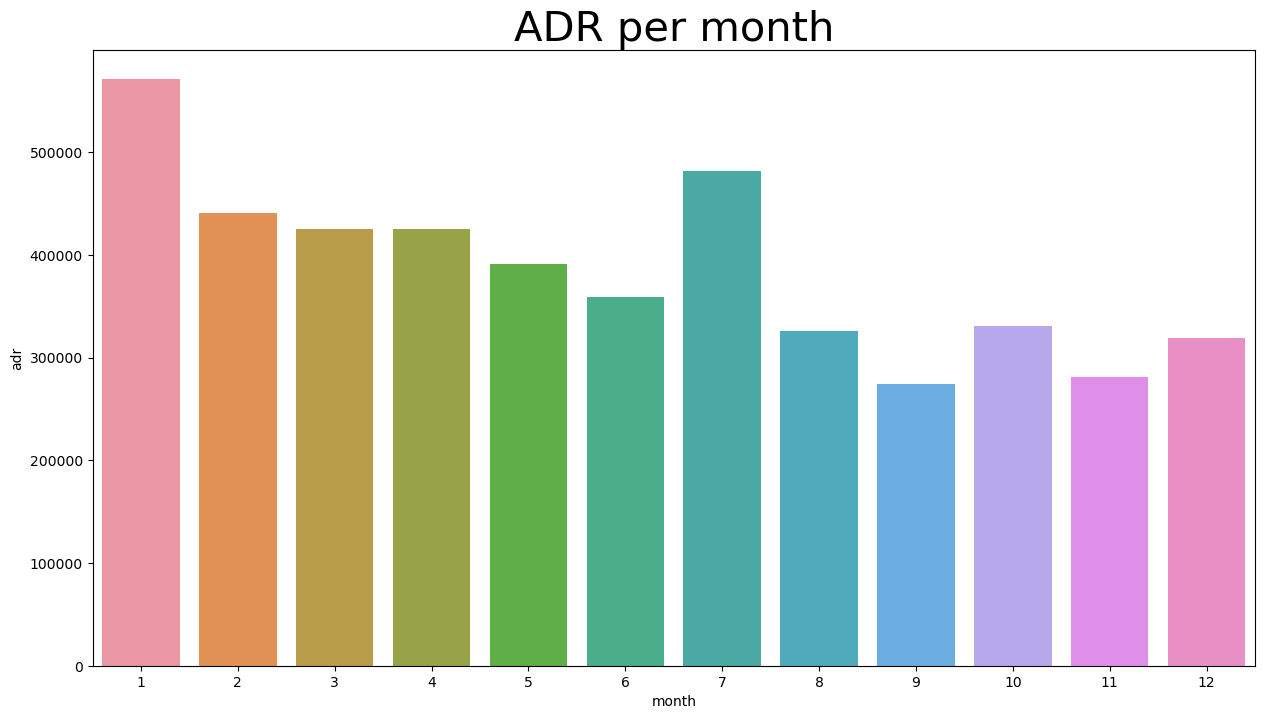

In [27]:
plt.figure(figsize=(15, 8))
plt.title("ADR per month", fontsize=30)
canceled_data = df[df["is_canceled"] == "Canceled"]
canceled_data_by_month = canceled_data.groupby("month")[["adr"]].sum().reset_index()
sns.barplot(x="month", y="adr", data=canceled_data_by_month)
plt.show()


### This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation can be responsible for the cancellation.

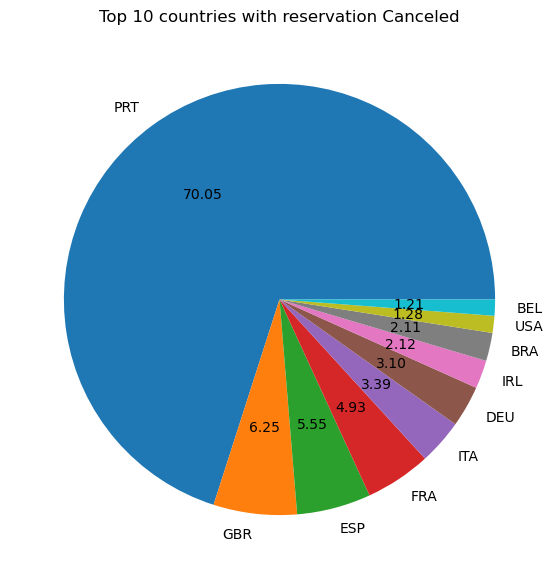

In [28]:
canceled_data = df[df["is_canceled"] == "Canceled"]
top_10_country = canceled_data["country"].value_counts()[:10]
plt.figure(figsize =(7,7))
plt.title("Top 10 countries with reservation Canceled")
plt.pie(top_10_country, autopct ="%.2f", labels = top_10_country.index)
plt.show()

### The top country is Portugal with the highest number of cancellations. Suggestions can be provided here to manage OYO's cancellaton rate.

In [29]:
df["market_segment"].value_counts()

market_segment
Online TA        56291
Offline TA/TO    24123
Groups           19757
Direct           12430
Corporate         5110
Complementary      731
Aviation           237
Name: count, dtype: int64

In [30]:
df["market_segment"].value_counts(normalize = True)*100

market_segment
Online TA        47.431306
Offline TA/TO    20.326258
Groups           16.647427
Direct           10.473631
Corporate         4.305732
Complementary     0.615947
Aviation          0.199698
Name: proportion, dtype: float64

### Around 47% of the clients come from online travel agencies, whereas 16% come from groups. Only 10% of clients book hotels directly by visiting them and making reservations.

In [31]:
canceled_data["market_segment"].value_counts(normalize = True)*100

market_segment
Online TA        46.948453
Groups           27.391324
Offline TA/TO    18.774390
Direct            4.347037
Corporate         2.216626
Complementary     0.204193
Aviation          0.117978
Name: proportion, dtype: float64

## Suggestions
### 1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, OYO could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.
### 2. As the ratio of the cancellation and not cancellation of the hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.
### 3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.
### 4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.

<img src="https://github.com/FarzadNekouee/Hotel_Booking_Cancellation_Prediction/blob/master/image.jpg?raw=true" width="1400">